# exploring data

In [26]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import cv2       # type: ignore
from skimage.feature import hog

In [27]:
train_path = 'dataset/GTSRB/Final_Training/Images'

In [31]:
def loadData(path, resizeSize=(32,32)):
    images = []
    labels = []
    bboxes = []  # boundary box with the sign information 
    sift_features = []
    sift_keypoints =[]
    hog_features = []
    hog_images = []


    for class_id in sorted(os.listdir(path)):  # list the classes (folders)  this the first loop which iterates on classes

        class_dir = os.path.join(path, class_id) # opens class folder for prossesing images in this calss

        class_label = int(class_id) # the label for this calss

        annotation_file = os.path.join(class_dir, f'GT-{class_id}.csv')
        annotations = pd.read_csv(annotation_file, sep=";")




        for idx, row in annotations.iterrows():  # instead of lopping in each directory to read its image i used the annotation which has each image file name 

            img_file = row['Filename']  # the row is a part of the data frame which has the column file name so i can read each image for proccesing it in a single class
            img_path = os.path.join(class_dir, img_file)

            img = cv2.imread(img_path)
            
            bbox = {
                'x1': row['Roi.X1'],
                'y1': row['Roi.Y1'],
                'x2': row['Roi.X2'],
                'y2': row['Roi.Y2'],
                'original_width': row['Width'],
                'original_height': row['Height']
            }
            # procssing the image itself
            
            img_resize = cv2.resize(img, resizeSize) # this for cnn 
            img_norm = img_resize / 255.0

            # proccessing using sift
            gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
            

            hog_desc, hog_image = hog(gray,pixels_per_cell=(8,8),cells_per_block=(2,2),block_norm='L2-Hys', visualize=True,feature_vector=True)

            sift = cv2.SIFT_create()
            keypoints, descriptors = sift.detectAndCompute(gray, None)

            if descriptors is not None:
                # print(f"Number of Keypoints Detected: {len(keypoints)}")
                # print(f"Descriptor Shape: {descriptors.shape}")
                sift_features.append(descriptors)
            else:
                # print(f"No keypoints found for image:",img_file)
                continue
            images.append(img_norm)
            labels.append(class_label)
            bboxes.append(bbox)
            sift_keypoints.append(keypoints)
            hog_features.append(hog_desc) 
            hog_images.append(hog_image)


        print("done with class :", class_id)
    x = np.array(images)
    y = np.array(labels)
    
    return x, y, bboxes, sift_features,sift_keypoints, hog_features,hog_images






# testing loading 

In [32]:


x,y,bboxes ,sift ,keypoints ,hog_features,hog_images= loadData(train_path)



done with class : 00000
done with class : 00001
done with class : 00002
done with class : 00003
done with class : 00004
done with class : 00005
done with class : 00006
done with class : 00007
done with class : 00008
done with class : 00009
done with class : 00010
done with class : 00011
done with class : 00012
done with class : 00013
done with class : 00014
done with class : 00015
done with class : 00016
done with class : 00017
done with class : 00018
done with class : 00019
done with class : 00020
done with class : 00021
done with class : 00022
done with class : 00023
done with class : 00024
done with class : 00025
done with class : 00026
done with class : 00027
done with class : 00028
done with class : 00029
done with class : 00030
done with class : 00031
done with class : 00032
done with class : 00033
done with class : 00034
done with class : 00035
done with class : 00036
done with class : 00037
done with class : 00038
done with class : 00039
done with class : 00040
done with class 

(35423, 32, 32, 3)
(35423,)


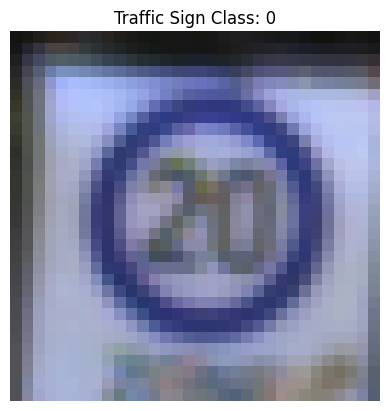

In [42]:
print(x.shape)  # N of images , hiehgt , width , channels 3 bcs we are on RGP
print(y.shape)

test_img = 100
plt.Figure(figsize=(5,5))

plt.imshow(x[test_img])
plt.title(f"Traffic Sign Class: {y[test_img]}")
plt.axis('off')
plt.show()


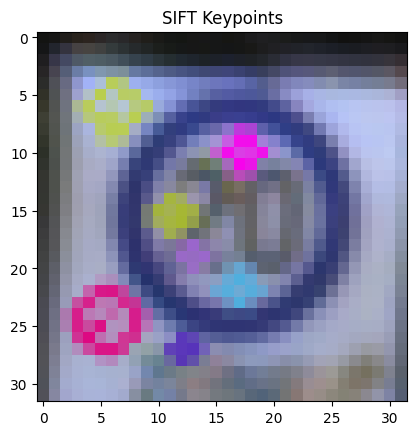

In [43]:
image_uint8 = (x[test_img] * 255).astype(np.uint8)


image_with_keypoints = cv2.drawKeypoints(image_uint8, keypoints[test_img], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image_with_keypoints, cmap="gray")
plt.title("SIFT Keypoints")
plt.show()

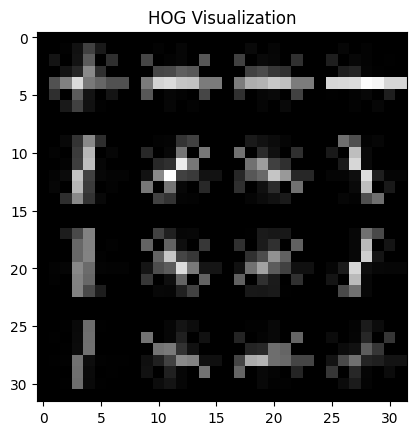

In [44]:
    
plt.imshow(hog_images[test_img], cmap='gray')
plt.title("HOG Visualization")
plt.show()


# tranning svm with hog data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
seed = 24

x_train_hog, x_test_hog , y_train, y_test = train_test_split(hog_features, y , test_size=.2 , random_state=seed)


svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(x_train_hog, y_train)

y_pred = svm.predict(x_test_hog)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)


accuracy: 0.9167254763585039


In [52]:
print(y_pred[2])
print(y_test[2])

17
17
